In [7]:
import ee
ee.Initialize()

In [8]:
# create a non-geodetic area of interest
aoi = ee.Geometry.Polygon([[
          [-122.75548673853245, 38.0411041965202],
          [-122.75548673853245, 37.64853352930806],
          [-122.11690641626683, 37.64853352930806],
          [-122.11690641626683, 38.0411041965202]]], None, False)

In [28]:
coords_web = aoi.transform('EPSG:3857', 1).coordinates().getInfo()

In [34]:
# query NED dem for US
dem = ee.Image("USGS/NED").visualize(**{"min": 0, "max": 700})

In [35]:
dem.getMapId()

{'mapid': 'projects/earthengine-legacy/maps/d0d7d18f7cc730af0c35931dda0bad59-e9040bc70677b1d4175242aa710d7ae3',
 'token': '',
 'tile_fetcher': <ee.data.TileFetcher at 0x10ab60b50>,
 'image': <ee.image.Image at 0x10aa9f8e0>}

In [36]:
tile_fetcher = dem.getMapId()['tile_fetcher']

In [43]:
url = tile_fetcher.url_format.format(x='${x}', y='${y}', z='${z}')
url

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps/d0d7d18f7cc730af0c35931dda0bad59-040532b7fdf0c0ed3869574d193713eb/tiles/${z}/${x}/${y}'

In [44]:
template =  '''<GDAL_WMS>
    <Service name="TMS">
        <ServerUrl>{url}</ServerUrl>
        <SRS>EPSG:3857</SRS>
    </Service>
    <DataWindow>
        <UpperLeftX>-20037508.34</UpperLeftX>
        <UpperLeftY>20037508.34</UpperLeftY>
        <LowerRightX>20037508.34</LowerRightX>
        <LowerRightY>-20037508.34</LowerRightY>
        <TileLevel>18</TileLevel>
        <TileCountX>1</TileCountX>
        <TileCountY>1</TileCountY>
        <YOrigin>top</YOrigin>
    </DataWindow>
    <Projection>EPSG:3857</Projection>
    <BlockSizeX>256</BlockSizeX>
    <BlockSizeY>256</BlockSizeY>
    <BandsCount>3</BandsCount>
    <Cache>
        <Path>../.gdalwmscache</Path>
        <Extension>.png</Extension>
    </Cache>
</GDAL_WMS>
'''
filled = template.format(url=url)

with open('ee.xml', 'w') as f:
    f.write(filled)

In [45]:
!gdalinfo ee.xml

Driver: WMS/OGC Web Map Service
Files: ee.xml
Size is 67108864, 67108864
Coordinate System is:
PROJCRS["WGS 84 / Pseudo-Mercator",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["unnamed",
        METHOD["Popular Visualisation Pseudo Mercator",
            ID["EPSG",1024]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["False easting",0,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["metre",1],
            ID["EPSG",8807]]],
    CS[Carte

In [73]:
# !gdal_translate ee.xml -scale 1000 -srcwin ${coords_web[0][0][0]} ${coords_web[0][0][1]} 2048 2048 out.png
ll = coords_web[0][0][0], coords_web[0][0][1]
lr = coords_web[0][1][0], coords_web[0][1][1]
ur = coords_web[0][2][0], coords_web[0][2][1]
ul = coords_web[0][3][0], coords_web[0][3][1]

!gdal_translate ee.xml -projwin ${ul[0]} ${ul[1]} ${lr[0]} ${lr[1]}  out.png

Input file size is 67108864, 67108864
ERROR 1: Error: Computed -srcwin 3.45345e+07 3.35544e+07 -92672 0 has negative width and/or height.


In [72]:
ul, lr

((-13665078.275813881, 4585234.085676097),
 (-13593991.839508666, 4529893.677197623))

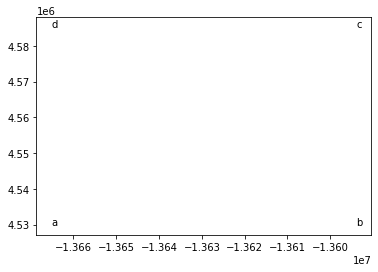

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(*a)
ax.plot(*b)
ax.plot(*c)
ax.plot(*d)
ax.annotate('a', a)
ax.annotate('b', b)
ax.annotate('c', c)
ax.annotate('d', d)
a, b, c, d
ax.autoscale()